# 04. 데이터 품질 점수화 및 결함 스코어링

## 목적
이 노트북에서는 정제된 학생 점수 데이터를 기반으로 데이터 품질을 진단하고, 
행별 품질등급(A/B/C) 및 전체 품질 평가(우수/보통/취약)을 수행한다.

## 주요 분석 항목
- 컬럼별 결함 조건 진단
- 행별 결함 수 및 등급화
- 전체 품질 평가 및 시각화

### 1. 라이브러리 및 사용자 정의 함수 로딩

In [1]:
import pandas as pd
from pathlib import Path

import sys
sys.path.append('../src')

from score_quality import score_quality
from visualize_quality import plot_column_defect_rate, plot_quality_distribution
INPUT_PATH = Path("../data/processed/cleaned_student_scores.csv")
OUTPUT_PATH = Path("../data/processed/quality_scored_scores.csv")
FIGURE_DIR = Path("../reports/figures")

### 2. 정제된 데이터 불러오기

In [3]:
df = pd.read_csv(INPUT_PATH)
print(df.shape)
df.head()

(500, 11)


,이름,나이,성별,점수,시험일,비고,재응시여부,정제된_점수,score_quality,정제된_나이,age_quality
0,NaN,0x1d,남,NaN,19.09.1979,NaN,N,NaN,C,29.0,B
1,서정남,twenty,male,59점,NaN,NaN,N,59.0,A,20.0,B
2,김영자,NaN,male,ninety-five,NaN,.,N,NaN,C,NaN,C
3,NaN,10세,male,none,10-06-1980,retake,Y,NaN,C,10.0,A
4,김재호,NaN,m,90점,1979년 05월 16일,없음,N,90.0,A,NaN,C


### 3. 품질 스코어링 함수 적용

In [4]:
df_scored = score_quality(df)
df_scored.head(10)

/Users/seulbeepark/Desktop/projects/mini-projects/DA_Messy_score_lab/notebooks/../src/score_quality.py:22: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['결함_시험일'] = pd.to_datetime(df['시험일'], errors='coerce').isna()


,이름,나이,성별,점수,시험일,비고,재응시여부,정제된_점수,score_quality,정제된_나이,age_quality,결함_이름,결함_정제된_나이,결함_성별,결함_정제된_점수,결함_시험일,결함_계수,품질등급,데이터셋_품질평가
0,NaN,0x1d,남,NaN,19.09.1979,NaN,N,NaN,C,29.0,B,True,False,True,True,False,3,B,취약
1,서정남,twenty,male,59점,NaN,NaN,N,59.0,A,20.0,B,False,False,True,False,True,2,B,취약
2,김영자,NaN,male,ninety-five,NaN,.,N,NaN,C,NaN,C,False,True,True,True,True,4,C,취약
3,NaN,10세,male,none,10-06-1980,retake,Y,NaN,C,10.0,A,True,False,True,True,True,4,C,취약
4,김재호,NaN,m,90점,1979년 05월 16일,없음,N,90.0,A,NaN,C,False,True,False,False,True,2,B,취약
5,김은서,14,남,ninety-five,NaN,note: 재응시,Y,NaN,C,14.0,A,False,False,True,True,True,3,B,취약
6,김지원,NaN,F,none,Aug/30/1982,Retook,Y,NaN,C,NaN,C,False,True,False,True,True,3,B,취약
7,이민지,NaN,남,57,Oct/25/1987,retake,Y,57.0,A,NaN,C,False,True,True,False,True,3,B,취약
8,NaN,twenty,f,eighty,1989년 06월 08일,note: 재응시,Y,NaN,C,20.0,B,True,False,False,True,True,3,B,취약
9,홍예준,twenty,male,eighty,NaN,NaN,N,NaN,C,20.0,B,False,False,True,True,True,3,B,취약


### 4. 결과 저장

In [5]:
OUTPUT_PATH.parent.mkdir(parents=True, exist_ok=True)
df_scored.to_csv(OUTPUT_PATH, index=False)
print(f"[INFO] 품질 분석 결과 저장 완료: {OUTPUT_PATH}")


[INFO] 품질 분석 결과 저장 완료: ../data/processed/quality_scored_scores.csv


### 5. 컬럼별 결함율 시각화

/Users/seulbeepark/Desktop/projects/mini-projects/DA_Messy_score_lab/notebooks/../src/visualize_quality.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_defects.values, y=top_defects.index, palette="Reds_r")


[INFO] 결함율 시각화 저장 완료: ../reports/figures/quality_var_chart.png


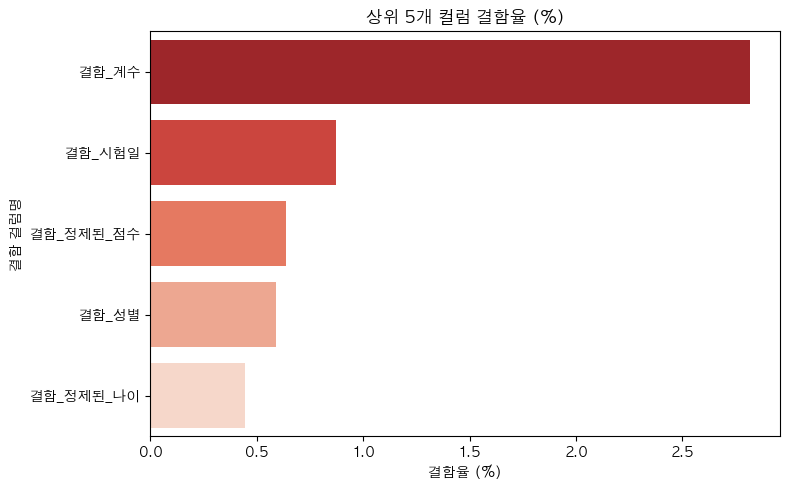

In [6]:
plot_column_defect_rate(df_scored, save_path=   FIGURE_DIR / "quality_var_chart.png")


### 6. 품질등급 분포 시각화

[INFO] 품질등급 분포 시각화 저장 완료: ../reports/figures/quality_grade_dist.png


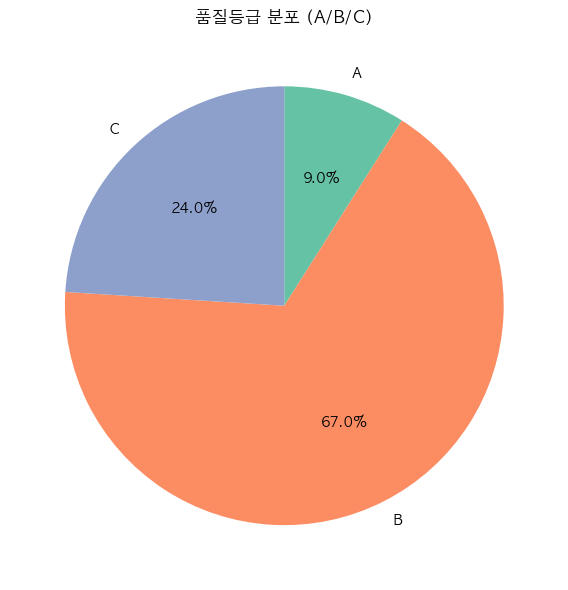

In [6]:
plot_quality_distribution(df_scored, save_path=FIGURE_DIR / "quality_grade_dist.png")

### 7. 마무리 및 분석 해석

## 분석 완료 
- 총 행 수: {len(df_scored)}명
- A등급 비율: {df_scored['품질등급'].value_counts(normalize=True).get('A', 0) * 100:.2f}%
- 전체 데이터셋 품질: `{df_scored['데이터셋_품질평가'].iloc[0]}`

**A등급 데이터만을 사용한 고신뢰 분석**이 가능하며,
**C등급 행**은 보강 대상 또는 제외 필요.

이후 분석에서 A등급 필터링하여 분석하거나, 품질 개선 전략 수립에 활용 가능.